## Import Packages and Load Data

In [90]:
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve 

import numpy as np
import matplotlib.pyplot as plt

In [49]:
cancer = load_breast_cancer()

In [50]:
cancer.data.shape

(569, 30)

In [51]:
X = cancer['data']
y = cancer['target']

## Train Test Split (70/30)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Scale features to improve performance

In [53]:
scaler = MinMaxScaler()

In [54]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [55]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
svc = SVC(random_state=0)

In [57]:
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
print('Train Set Score: {:.2f}'.format(svc.score(X_train_scaled, y_train)))
print('Test Set Score: {:.2f}'.format(svc.score(X_test_scaled, y_test)))

Train Set Score: 0.98
Test Set Score: 0.97


In [59]:
pred = svc.predict(X_test_scaled)

In [60]:
print(confusion_matrix(y_test, pred))

[[ 62   4]
 [  1 104]]


In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.96      0.99      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Increase C parameter in SVC to fit a more complex model

In [62]:
svc = SVC(C=10, random_state=0)

In [63]:
svc.fit(X_train_scaled, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
print('Train Set Score: {:.2f}'.format(svc.score(X_train_scaled, y_train)))
print('Test Set Score: {:.2f}'.format(svc.score(X_test_scaled, y_test)))

Train Set Score: 0.99
Test Set Score: 0.97


In [67]:
pred = svc.predict(X_test_scaled)

In [68]:
print(confusion_matrix(y_test, pred))

[[ 63   3]
 [  2 103]]


In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## We want to minimize false negatives for cancer predictions (maximize recall)
Note: In practice, do not use the test set to set the threshold but rather a validation data set

In [102]:
pred_lower_threshold = svc.decision_function(X_test_scaled) > -.4

Lowering the threshold (default = 0) to -0.4 means that we classify more samples as Class 1 (malignant) and minimizes the false negatives, but increases the false positives. We can see that the recall score for class 1 is now 100% which means no false negatives. This came at the cost of reducing the precision score (we now have more false positives).

In [103]:
print(confusion_matrix(y_test, pred_lower_threshold))

[[ 61   5]
 [  0 105]]


In [104]:
print(classification_report(y_test, pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        66
           1       0.95      1.00      0.98       105

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## Precision-Recall Curve

In [79]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test_scaled))

In [80]:
close_zero = np.argmin(np.abs(thresholds))

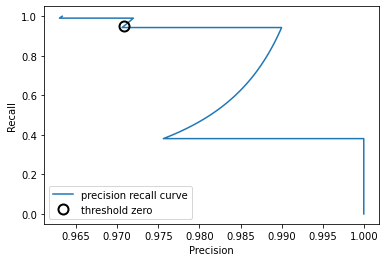

In [92]:
plt.plot(precision, recall, label='precision recall curve')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best');

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_scaled))

In [83]:
close_zero = np.argmin(np.abs(thresholds))

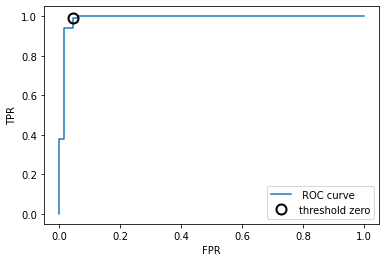

In [85]:
plt.plot(fpr, tpr, label=' ROC curve')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best');

In [86]:
print('AUC: {:.2f}'.format(roc_auc_score(y_test, svc.decision_function(X_test_scaled))))

AUC: 0.99
